In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import os 
from pathlib import Path

path = Path('data')
os.listdir(path)

['sample_submission.csv',
 'metadata',
 'patches-fr',
 'pre-extracted',
 'geolifeclef-2022-lifeclef-2022-fgvc9.zip',
 'observations',
 'patches_sample',
 'patches-us',
 'rasters']

In [6]:
import pandas as pd 

pd.read_csv(path / 'sample_submission.csv')

,Id,Predicted
0,10000293,0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18...
1,10000302,0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18...
2,10000346,0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18...
3,10000468,0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18...
4,10000481,0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18...
...,...,...
36416,22067746,0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18...
36417,22067972,0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18...
36418,22068007,0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18...
36419,22068076,0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18...


In [7]:
os.listdir(path / 'observations')

['observations_fr_train.csv',
 'observations_fr_test.csv',
 'observations_us_train.csv',
 'observations_us_test.csv']

In [11]:
obs_fr = pd.read_csv(path / 'observations' / 'observations_fr_train.csv', sep=';')
obs_fr

,observation_id,latitude,longitude,species_id,subset
0,10561949,45.705116,1.424622,241,train
1,10131188,45.146973,6.416794,101,train
2,10799362,46.783695,-2.072855,700,train
3,10392536,48.604866,-2.825003,1456,train
4,10335049,48.815567,-0.161431,157,train
...,...,...,...,...,...
671239,10543820,43.542500,4.967778,1041,train
671240,10304005,43.829823,4.450699,19,train
671241,10433186,43.329414,5.599397,906,train
671242,10352176,43.556637,7.016971,516,train


In [12]:
obs_fr.subset.unique()

array(['train', 'val'], dtype=object)

In [15]:
len(obs_fr[obs_fr.subset == 'train']), len(obs_fr[obs_fr.subset == 'val'])

(656263, 14981)

In [16]:
obs_fr_test = pd.read_csv(path / 'observations' / 'observations_fr_test.csv', sep=';')
obs_fr_test

,observation_id,latitude,longitude
0,10782781,43.601788,6.940195
1,10364138,46.241711,0.683586
2,10692017,45.181095,1.533459
3,10222322,46.938450,5.298678
4,10241950,45.017433,0.960736
...,...,...,...
17290,10579652,43.354008,6.160390
17291,10317161,49.120434,6.089808
17292,10452635,43.297234,6.620753
17293,10543186,43.352056,2.804166


In [17]:
obs_us = pd.read_csv(path / 'observations' / 'observations_us_train.csv', sep=';')
obs_us

,observation_id,latitude,longitude,species_id,subset
0,20000173,33.197660,-116.180680,4911,train
1,20000175,34.037968,-118.876755,4912,train
2,20000176,27.620740,-97.222690,4913,train
3,20000177,29.155582,-95.653930,4914,train
4,20000179,36.605740,-121.959510,4915,train
...,...,...,...,...,...
956226,22068171,29.602327,-94.555860,5041,train
956227,22068172,38.029580,-122.883995,8688,train
956228,22068173,37.913720,-121.948814,12154,train
956229,22068174,37.206974,-122.067154,5309,val


In [18]:
data_train = pd.concat([obs_fr, obs_us])
data_train

,observation_id,latitude,longitude,species_id,subset
0,10561949,45.705116,1.424622,241,train
1,10131188,45.146973,6.416794,101,train
2,10799362,46.783695,-2.072855,700,train
3,10392536,48.604866,-2.825003,1456,train
4,10335049,48.815567,-0.161431,157,train
...,...,...,...,...,...
956226,22068171,29.602327,-94.555860,5041,train
956227,22068172,38.029580,-122.883995,8688,train
956228,22068173,37.913720,-121.948814,12154,train
956229,22068174,37.206974,-122.067154,5309,val


In [22]:
data_train.species_id.value_counts()

5045     6701
3072     5934
2902     4846
5053     4043
3034     3944
         ... 
14551       3
4581        3
15790       3
15789       3
17036       3
Name: species_id, Length: 17037, dtype: int64

In [29]:
sample = data_train.observation_id.iloc[0]
sample

10561949

In [38]:
def get_patch(sample):
    country_id = str(sample)[0]
    country = 'fr' if country_id == '1' else 'us'
    subfolder = str(sample)[-2:]
    subsubfolder = str(sample)[-4:-2]
    return 'patches-' + country + '/' + subfolder + '/' + subsubfolder 

patch = get_patch(sample)
patch

'patches-fr/49/19'

In [39]:
os.listdir(path / patch)

['10151949_rgb.jpg',
 '10011949_rgb.jpg',
 '10201949_landcover.tif',
 '10631949_altitude.tif',
 '10511949_landcover.tif',
 '10701949_rgb.jpg',
 '10601949_near_ir.jpg',
 '10111949_altitude.tif',
 '10181949_landcover.tif',
 '10201949_altitude.tif',
 '10191949_rgb.jpg',
 '10271949_landcover.tif',
 '10381949_altitude.tif',
 '10491949_landcover.tif',
 '10561949_landcover.tif',
 '10651949_altitude.tif',
 '10011949_near_ir.jpg',
 '10181949_altitude.tif',
 '10381949_near_ir.jpg',
 '10281949_altitude.tif',
 '10161949_landcover.tif',
 '10671949_altitude.tif',
 '10371949_rgb.jpg',
 '10631949_near_ir.jpg',
 '10141949_rgb.jpg',
 '10311949_landcover.tif',
 '10301949_rgb.jpg',
 '10671949_rgb.jpg',
 '10661949_near_ir.jpg',
 '10751949_altitude.tif',
 '10491949_rgb.jpg',
 '10391949_near_ir.jpg',
 '10151949_near_ir.jpg',
 '10101949_near_ir.jpg',
 '10111949_landcover.tif',
 '10351949_altitude.tif',
 '10131949_altitude.tif',
 '10471949_altitude.tif',
 '10011949_landcover.tif',
 '10211949_landcover.tif',
 '

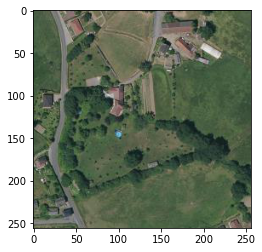

In [44]:
from skimage.io import imread 
import matplotlib.pyplot as plt

img_path = patch + '/' + str(sample) + '_rgb.jpg'
img = imread(path / img_path)
plt.imshow(img)
plt.show()